# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6
num_terms=6
class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum
        self.v = self.coef

    def rmsprop(self, gradient):
        self.cache = (self.gama * self.cache) + ((1 - self.gama) * gradient**2)
        self.coef = self.coef - (self.learning_rate /(np.sqrt(self.cache + self.eps)) * gradient)
        return self.coef
    
    def sgd_momentum(self, gradient):
        self.v= self.v * self.mu + (self.learning_rate*gradient)
        self.coef= self.coef - self.v
        return self.coef
        
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                Xi = X[i,:]   
                error = self.linearPredict(Xi) - y[i]
                
              # Compute gradients
                gradient = np.array([2*error*Xi[0]+2*self.regularization * self.coef[0], 
                                2*error*Xi[1]+2*self.regularization * self.coef[1],
                                2*error*Xi[2]+2*self.regularization * self.coef[2],
                                2*error*Xi[3]+2*self.regularization * self.coef[3],
                                2*error*Xi[4]+2*self.regularization * self.coef[4],
                                2*error*Xi[5]+2*self.regularization * self.coef[5]])
               
              # Update weights
                if update_rule == "sgd_momentum":
                    self.sgd_momentum(gradient)
                else:
                    self.rmsprop(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        x = np.zeros((X.shape[0], num_terms))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
       
        return x
        
    def linearPredict(self, X_features):
       
       return X_features.dot(self.coef)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

<ipython-input-1-2564226c5828>:73: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
<ipython-input-1-2564226c5828>:63: RuntimeWarning: overflow encountered in double_scalars
  2*error*Xi[5]+2*self.regularization * self.coef[5]])
<ipython-input-1-2564226c5828>:63: RuntimeWarning: invalid value encountered in double_scalars
  2*error*Xi[5]+2*self.regularization * self.coef[5]])
<ipython-input-1-2564226c5828>:58: RuntimeWarning: invalid value encountered in double_scalars
  gradient = np.array([2*error*Xi[0]+2*self.regularization * self.coef[0],
<ipython-input-1-2564226c5828>:59: RuntimeWarning: invalid value encountered in double_scalars
  2*error*Xi[1]+2*self.regularization * self.coef[1],
<ipython-input-1-2564226c5828>:60: RuntimeWarning: invalid value encountered in double_scalars
  2*error*Xi[2]+2*self.regularization * self.coef[2],
<ipython-input-1-2564226c5828>:61: RuntimeWarning: invalid value encountered in double_scalars
  2*error*Xi[3]+2*self.r

best learning rate sgd_momentum (0.0001, 0)
second best learning rate sgd_momentum (0.001, 0)
MSE scores sgd_momentum [0.020338107645762996, 0.0204193771226865]
best learning rate rmsprop (0.001, 0)
second best learning rate rmsprop (0.001, 0.01)
MSE scores rmsprop [0.021243031705864876, 0.021239874413295147]


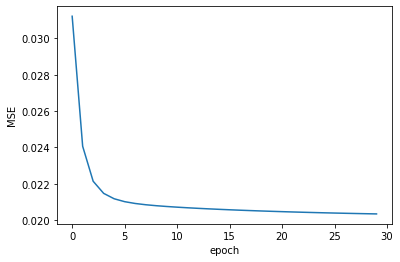

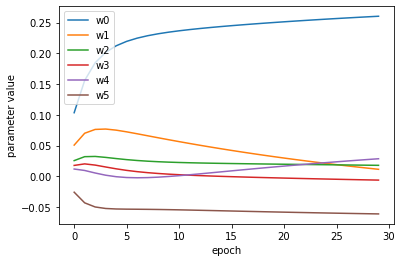

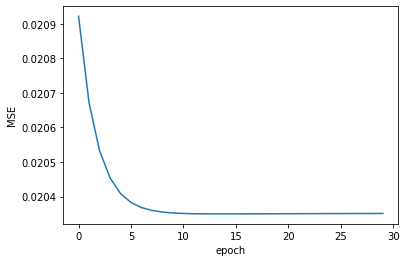

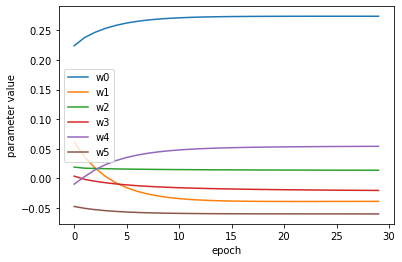

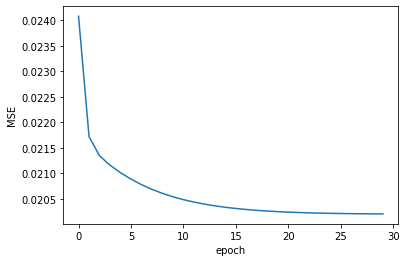

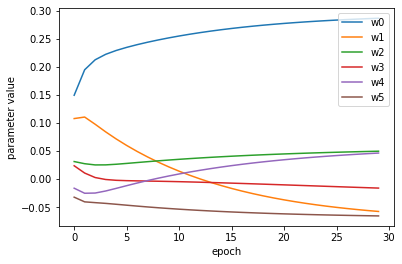

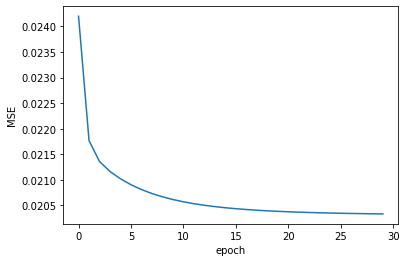

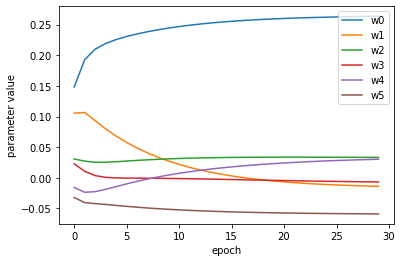

In [3]:
import math

ls = []
for l in range(0, len(learning_rate)):
    for r in range(0, len(regularization)):
        ls.append((learning_rate[l], regularization[r]))

mse_list = []

for i in range(0, len(ls)):
    sgd = LinearRegression(ls[i][0], ls[i][1], n_epochs)
    sgd.fit(X,y,plot=False)
    mse_list.append(sgd.lowest_mse)

top2 = np.argsort(mse_list)[:2]

print('best learning rate sgd_momentum',ls[top2[0]])
print('second best learning rate sgd_momentum',ls[top2[1]])


for i in top2:
    sgd = LinearRegression(ls[i][0], ls[i][1], n_epochs)
    sgd.fit(X,y,update_rule='sgd_momentum',plot=True)

print('MSE scores sgd_momentum', mse_list[:2])

mse_list = []

for i in range(0, len(ls)):
    sgd = LinearRegression(ls[i][0], ls[i][1], n_epochs)
    sgd.fit(X,y,update_rule='RMSprop',plot=False)
    mse_list.append(sgd.lowest_mse)

top2 = np.argsort(mse_list)[:2]

print('best learning rate rmsprop',ls[top2[0]])
print('second best learning rate rmsprop',ls[top2[1]])

for i in top2:
    sgd = LinearRegression(ls[i][0], ls[i][1], n_epochs)
    sgd.fit(X,y,update_rule='RMSprop',plot=True)

print('MSE scores rmsprop', mse_list[:2])

#### Observe the results, compare the performance of the two learning methods (4 pts).



The best learning for sgd_momentum is lower than the best learning rate for rmsprop. The second best learning rate is 0.001 for both models. The mean square error scores are lower for sgd_momentum using both the 0.0001 learning rate and the 0.001 learning rate. This is due to the sgd_momentum model speeding up the gradient towards the local minima.

# Answer:

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

### Part A

Train loss for Tanh at the end of 1000 epochs = 0.275
Test loss for Tanh at the end of 1000 epochs = 0.293

Train loss for linear activation at the end of 1000 epochs = 0.496
Test loss for linear activation at the end of 1000 epochs = 0.507

What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

The train and test loss error is higher using linear activation at the end of 1000 epochs compared to using Tanh. This could be due to the data not being linear in nature, additionally linear activation does not help with complexity of paramaters. Tanh is better for non-linear activation functions and this will lead to lower error. 


### Part B

Train loss for Tanh at the end of 1000 epochs with 4 neurons = 0.014
Test loss for Tanh at the end of 10000 epochs with 4 neurons = 0.017

Train loss for Tanh at the end of 1000 epochs with 8 neurons = 0.010
Test loss for Tanh at the end of 10000 epochs with 8 neurons = 0.010

What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this?

The decision boundary did not change very much as the number of neurons increases. However, the model with 8 neurons resulted in lower training and test loss which is due to the larger number of parameters available to the model to train the data with. 


### Part C

For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of 100 epochs, 1000 epochs respectively.

##### Learning rate 10:
Train loss at the end of 100 = 0.552
Test loss at the end of 100 = 0.616

Train loss at the end of 1000 = 0.728
Test loss at the end of 1000 = 0.768

##### Learning rate 1:
Train loss at the end of 100 = 0.243
Test loss at the end of 100 = 0.254

Train loss at the end of 1000 = 0.243
Test loss at the end of 1000 = 0.261

##### Learning rate 0.1:
Train loss at the end of 100 = 0.011
Test loss at the end of 100 = 0.010

Train loss at the end of 1000 = 0.001
Test loss at the end of 1000 = 0.000

##### Learning rate 0.01:
Train loss at the end of 100 = 0.105
Test loss at the end of 100 = 0.106

Train loss at the end of 1000 = 0.011
Test loss at the end of 1000 = 0.013

##### Learning rate 0.001:
Train loss at the end of 100 = 0.266
Test loss at the end of 100 = 0.271

Train loss at the end of 1000 = 0.103
Test loss at the end of 1000 = 0.100

What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers?

The training and test loss decrease signficantly from a learning rate of 10 to 0.1, however, once the learning rate is decreased from 0.1 to 0.001 the training and test loss start to increase again. Indicating that for an ReLU activation function a learning rate of 0.1 is optimal. 

The training and test loss increase with larger epochs when the learning rate is 10 and 1. When the learning rates become smaller at 0.1, 0.01, and 0.001 the training and test loss decrease as the epochs increase. This is due to smaller learning rates requiring more epochs due to the smaller changes made to the weights at each update.



### Part D

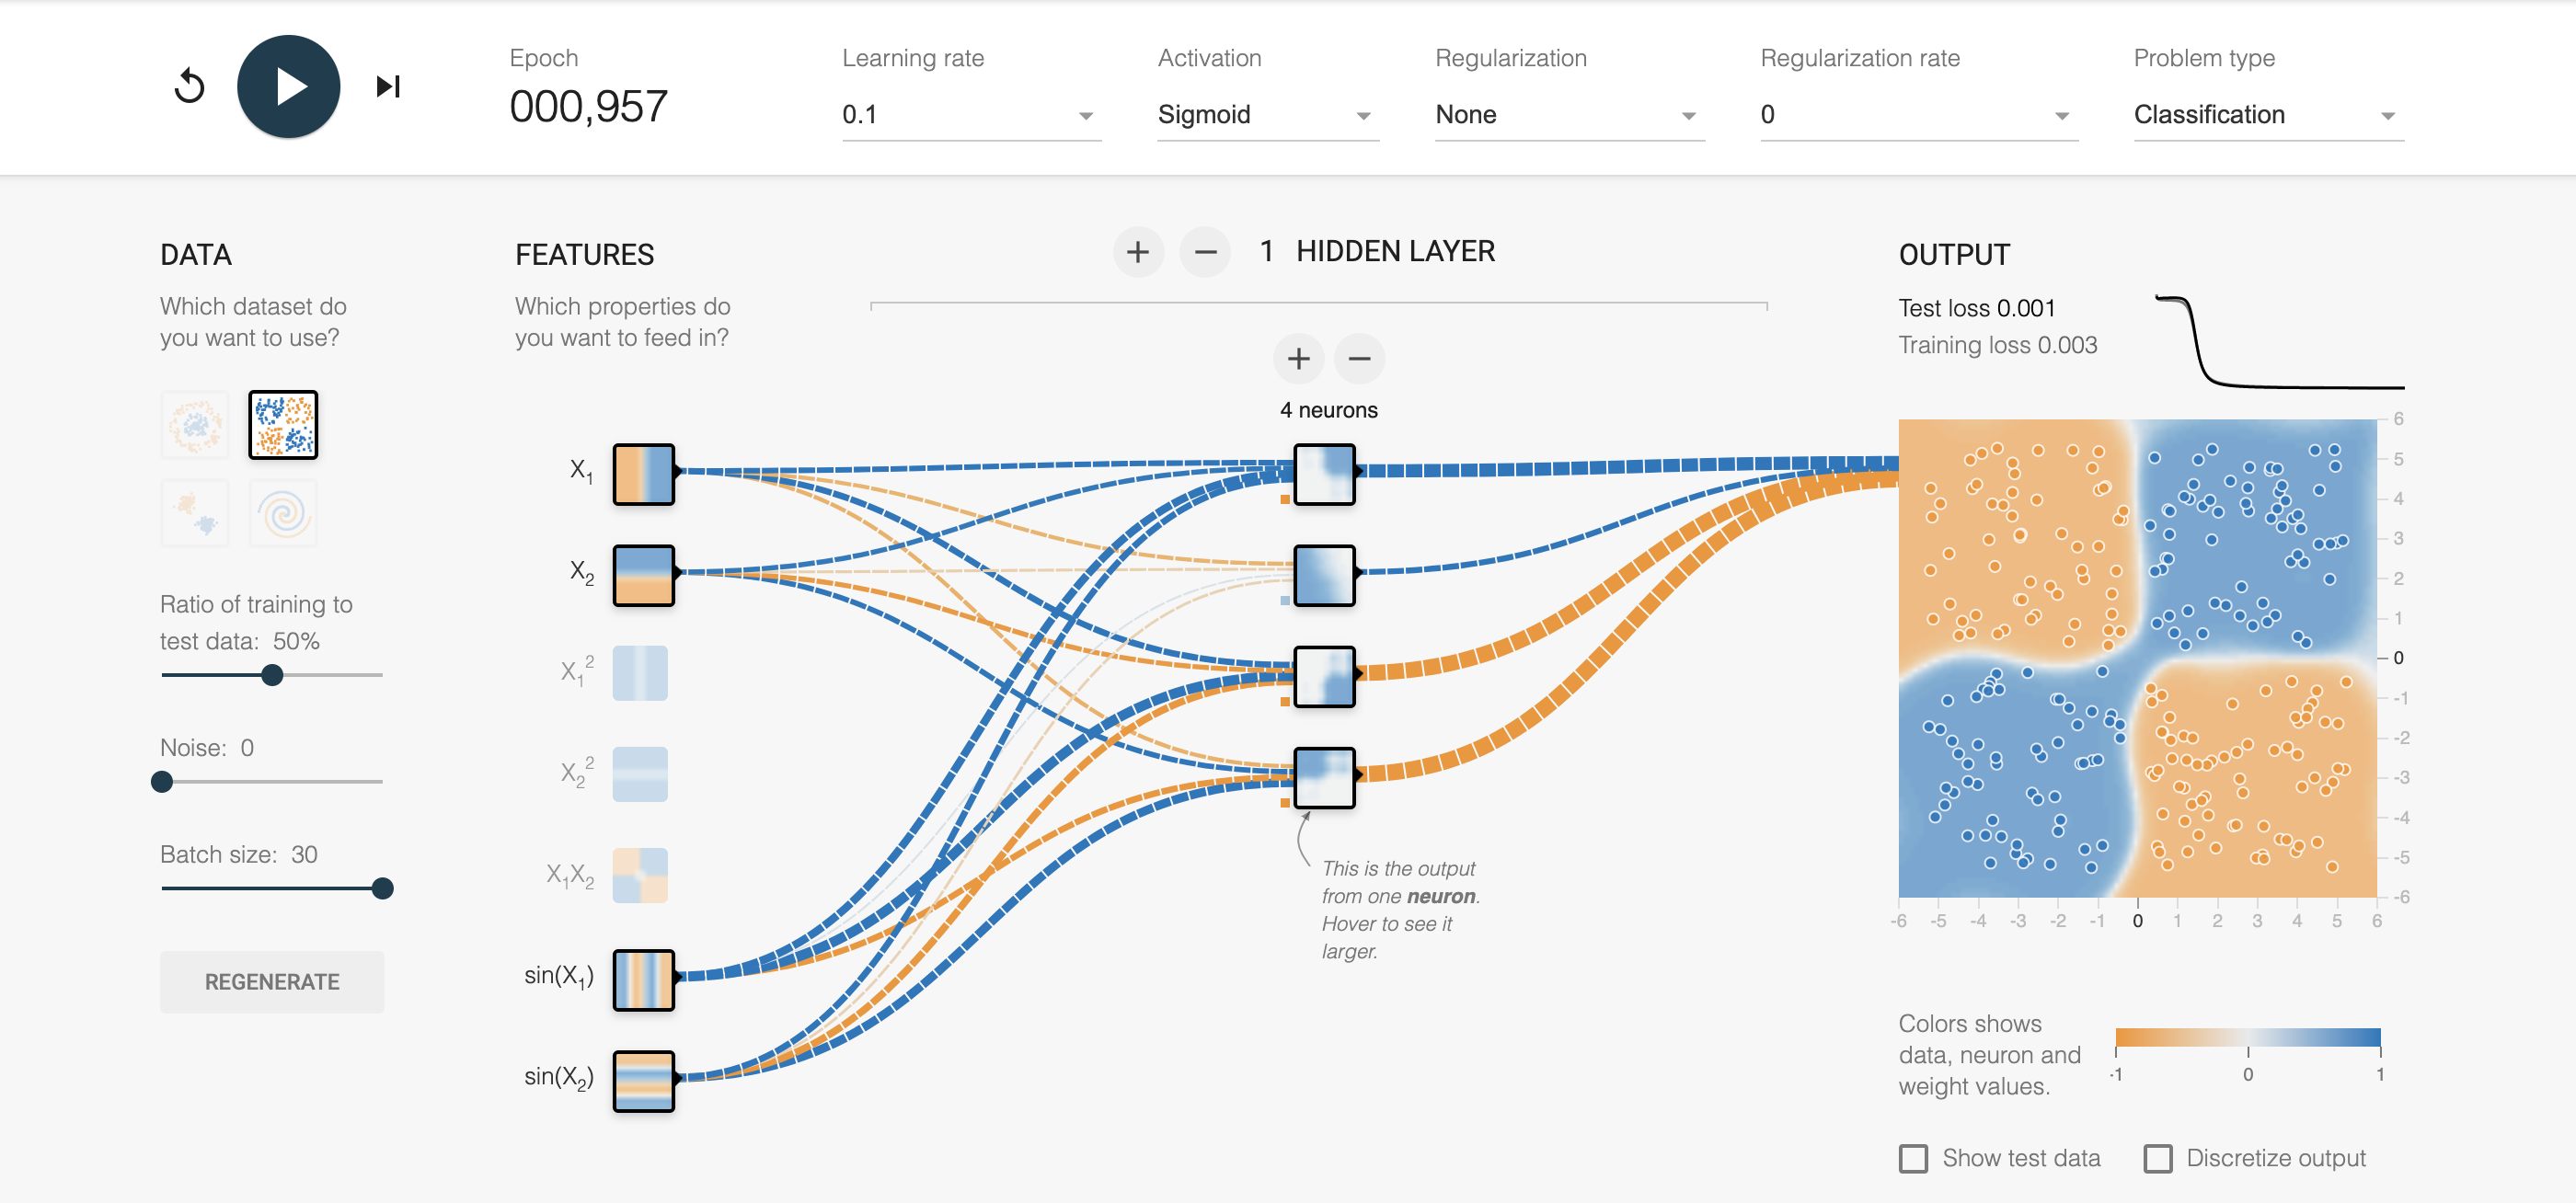

Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

We used a learning rate of 0.1 because it was the best learning rate with the Tanh activation. We then chose the Sigmoid activation because it standardizes the model. The Sigmoid function having a threshold of 0 and 1 led to a smaller training and test loss as opposed to the model without it. Adding the sin(X1) and sin(X2) features to the model helped to lower the training and test loss as opposed to running the model without them.

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [4]:
# install pyod using pip first
!pip install pyod

In [18]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

### Part A

In [6]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters
clf.fit(X_train) # fit the model using X_train


# YOUR CODE SHOULD COME HERE

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [7]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results
clf_name = 'MCD'
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test) 

evaluate_print(clf_name,y_test, y_test_scores)
# YOUR CODE SHOULD COME HERE

MCD ROC:0.8689, precision @ rank n:0.6


### Part B

/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


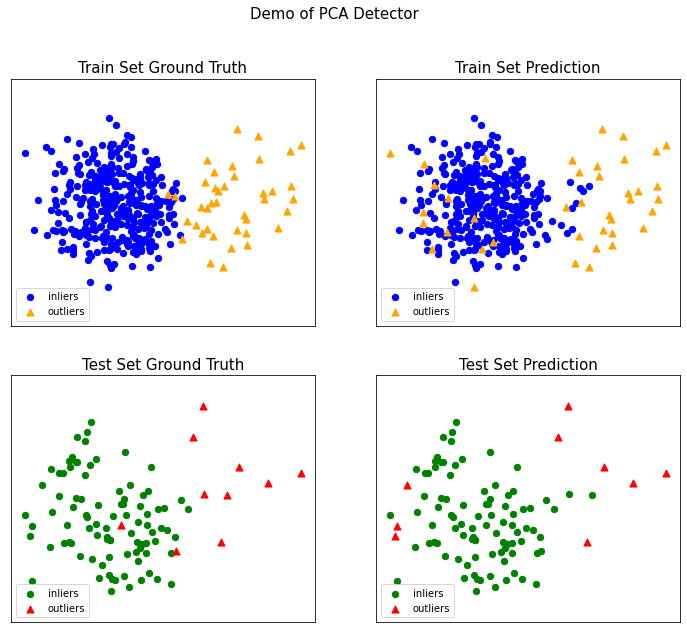

In [8]:
# (b)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
clf_name = 'PCA'
# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train) # YOUR CODE SHOULD COME HERE
test_principalComponents = pca.fit_transform(X_test)# YOUR CODE SHOULD COME HERE



from pyod.utils.example import visualize


# get the prediction labels and outlier scores of the training data
# y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
# y_train_scores = clf.decision_scores_# raw outlier scores
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)


# visualize the results
visualize(clf_name, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,
            y_test_pred, show_figure=True, save_figure=True)

# YOUR CODE SHOULD COME HERE

### Part C

#### CBLOF Model


On Test Data:
CBLOF ROC:0.9289, precision @ rank n:0.6


/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


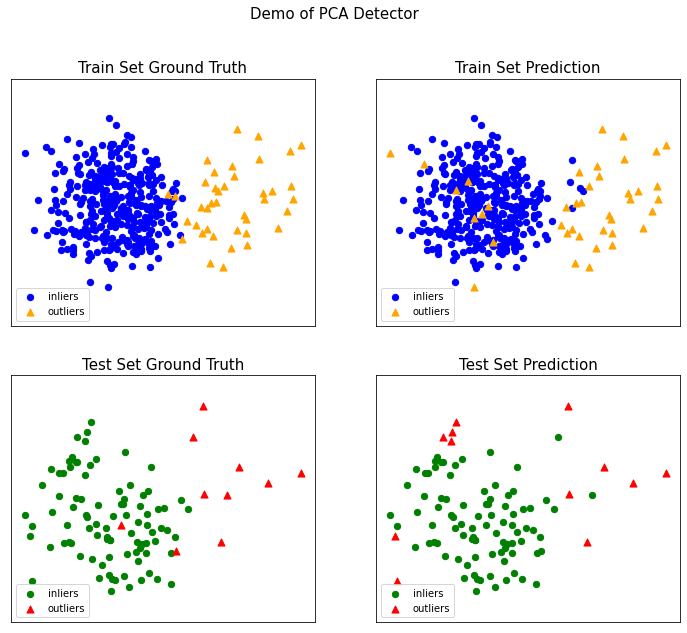

In [9]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD


# train CBLOF detector
clf_name = 'CBLOF'
clf = CBLOF()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores


print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)



pca = PCA(n_components=2)
clf_name = 'PCA'
# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train) # YOUR CODE SHOULD COME HERE
test_principalComponents = pca.fit_transform(X_test)# YOUR CODE SHOULD COME HERE





# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores


# visualize the results
visualize(clf_name, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,
            y_test_pred, show_figure=True, save_figure=False)

#### COPOD Model


On Test Data:
COPOD ROC:0.9556, precision @ rank n:0.8


/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


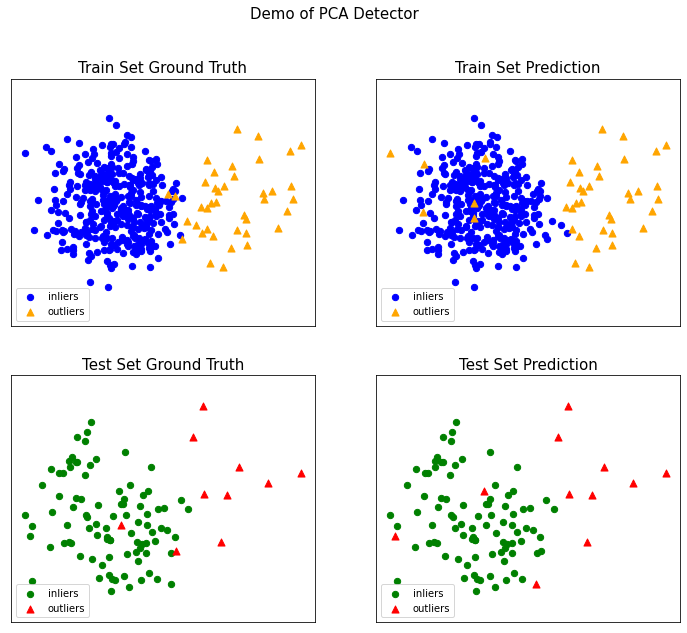

In [10]:
# train COPOD detector
clf_name = 'COPOD'
clf = COPOD()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores


print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)



pca = PCA(n_components=2)
clf_name = 'PCA'
# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train) # YOUR CODE SHOULD COME HERE
test_principalComponents = pca.fit_transform(X_test)# YOUR CODE SHOULD COME HERE





# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores


# visualize the results
visualize(clf_name, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,
            y_test_pred, show_figure=True, save_figure=True)

#### Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

MCD ROC:0.8689, precision @ rank n:0.6
CBLOF ROC:0.8767, precision @ rank n:0.6
COPOD ROC:0.9556, precision @ rank n:0.8

The ROC is highest for the COPOD model showing that this model is the most accurate. The COPOD model also has the highest precision rank meaning that this model is the most accurate at identifying only anomolies. The COPOD visualization also predicts the outliers on the test set more accurately than the model predicts outliers on the training set.

The CBLOF model has a lower ROC and precision rank which corresponds with the visualizations. The visualiztions show that the CBLOF model is less accurate at predicting outliers on both the training and the test set.

The MCD model has the lowest ROC showing that this model is the least accurate out of the three and it is the least precise at identifying only anomolies with a recision rank of 0.6. The visualization shows that model is not very accurate at predicting outliers for the training data and while slightly better on the test data it is still the least accurate compared to the CBLOF and COPOD models. 

# Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

The goal of PCA is to reduce the dimensionality of a data set. The first step is to standardize the data set to reduce the sensitivity to larger values in the model. The next step is to setup the covariance matrix. This is done to understand if there is any relationship between the variables. If the covariance value is positive, then the two variables are correlated versus if the value is negative, then the two variables are inversely correlated. The covariance matrix essentially helps to optimize the model since it identifies the significant variables and correlations which are used to create the eigan vectors and compute the eigan values. The model will try to put the most maximum possible information in the first component and reduces dimensionality with each component. Once all the components are computed, then the significant ones are identified and used to form the feature vector.



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [11]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [12]:
data.isnull().sum(axis = 0)

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [13]:
from sklearn.preprocessing import OneHotEncoder
data_dm= data.copy()

labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
data_dm['binned_yr_built']=pd.cut(data['YearBuilt'],bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020],labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],include_lowest=True)

pd.get_dummies(data_dm['binned_yr_built'])


,1900-1920,1920-1940,1940-1960,1960-1980,1980-2000,2000-2020
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,1,0,0
1457,0,0,1,0,0,0
1458,0,0,1,0,0,0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [14]:
perc = 65.0
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
df = data.dropna( axis=1, 
                thresh=min_count)
df


,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,6,8,1976,1976,0.0,TA,...,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,7,5,1915,1970,0.0,TA,...,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,84.0,14260,8,5,2000,2000,350.0,Gd,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,6,5,1999,2000,0.0,TA,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,RL,85.0,13175,6,6,1978,1988,119.0,TA,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,RL,66.0,9042,7,9,1941,2006,0.0,Ex,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,RL,68.0,9717,5,6,1950,1996,0.0,TA,...,366,0,112,0,0,0,0,4,2010,142125



d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [15]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean
sample_mean = np.mean(sample_ages)

#Population mean
pop_mean = np.mean(data['SalePrice'])
print('The sample mean is',sample_mean)
print('The population mean is', pop_mean)


The sample mean is 178292.63125
The population mean is 180921.19589041095


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [16]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value
z_critical= stats.norm.ppf(1-(.05/2))


#Get population standard deviation
pop_stdev= stats.tstd(data['SalePrice'])

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# #Print confidence interval and true mean value
print(confidence_interval)
print(np.mean(data_dm['SalePrice']))


(166522.08555078227, 197662.97444921773)
180921.19589041095


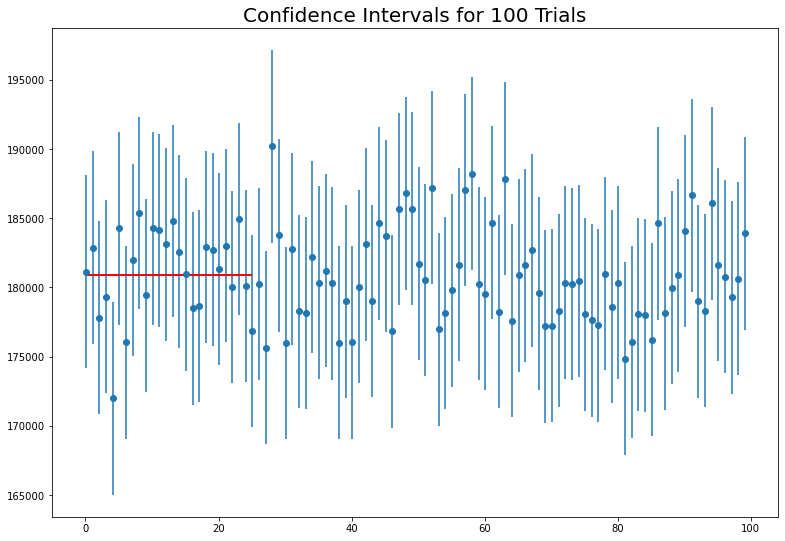

In [17]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    z_critical= stats.norm.ppf(1-(.05/2))
    # compute population standard deviation     
    pop_stdev= stats.tstd(data['SalePrice'])
    
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

Plot the confidence intervals and interpret how it captures the population mean.

The confidence intervals do not capture the population mean very well because only 2 of the 100 intervals capture the population mean at 180921.